# ***4.1.30***

In [96]:
!pip install scikit-fuzzy

In [97]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz

In [98]:
dataset = pd.read_csv('/content/credit_card_clients.csv', header = 1)

In [99]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [100]:
dataset.shape

(30000, 25)

In [101]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [102]:
dataset['BILL TOTAL'] = dataset['BILL_AMT1'] + dataset['BILL_AMT2'] + dataset['BILL_AMT3'] + dataset['BILL_AMT4'] + dataset['BILL_AMT5'] + dataset['BILL_AMT6']

In [103]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL TOTAL'],
      dtype='object')

In [145]:
features = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL TOTAL']

In [104]:
dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,238114
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,2724595
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,13486
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,65212
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,26919


In [105]:
dataset.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [106]:
dataset['LIMIT_BAL'].mean()

np.float64(167484.32266666667)

In [107]:
dataset['BILL TOTAL'].mean()

np.float64(269861.6712)

# ***4.2.31***

### ***Using CT Start.....***

In [108]:
df = dataset

In [109]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653


In [110]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653


In [111]:
df = df.drop(columns=['ID'])

In [112]:
# --- Separate features (you can also drop target column if needed) ---
# For unsupervised clustering, we typically drop the target label
if 'default payment next month' in df.columns:
    df_features = df.drop(columns=['default payment next month'])
else:
    df_features = df.copy()

In [113]:
# --- Standardize the data (important for FCM) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [114]:
# --- Transpose for scikit-fuzzy (expects features x samples) ---
X_scaled = X_scaled.T

In [115]:
# --- Choose number of clusters ---
n_clusters = 3  # You can experiment with 2–6 clusters

In [116]:
# --- Run Fuzzy C-Means ---
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

In [117]:
# --- Predict cluster membership for each sample ---
cluster_membership = np.argmax(u, axis=0)

In [118]:
# --- Add cluster labels to original DataFrame ---
df['Cluster'] = cluster_membership

In [119]:
# --- Show cluster distribution ---
print(df['Cluster'].value_counts())

Cluster
1    11231
0    11000
2     7769
Name: count, dtype: int64


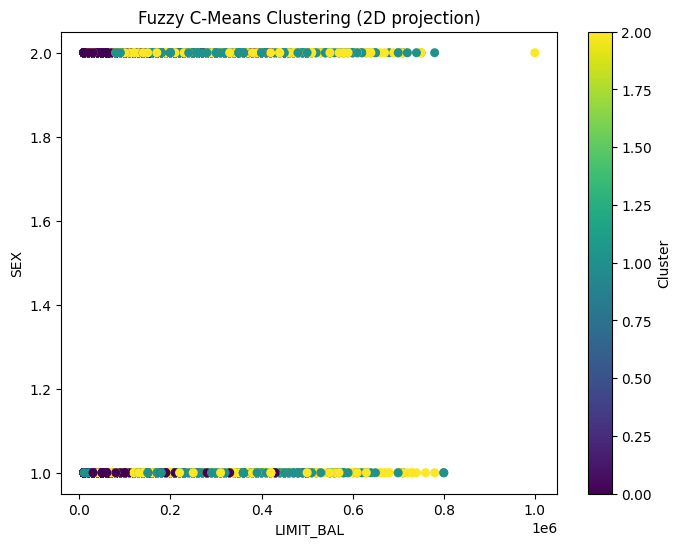

In [120]:
# --- Visualize 2D projection (using two features for simplicity) ---
plt.figure(figsize=(8, 6))
plt.scatter(df_features.iloc[:, 0], df_features.iloc[:, 1], c=cluster_membership, cmap='viridis', s=30)
plt.title('Fuzzy C-Means Clustering (2D projection)')
plt.xlabel(df_features.columns[0])
plt.ylabel(df_features.columns[1])
plt.colorbar(label='Cluster')
plt.show()

In [121]:
# --- Print Fuzzy Partition Coefficient (FPC) ---
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")

Fuzzy Partition Coefficient (FPC): 0.3638


### ***Using CT End.....***

### ***From Video Start...***

***Preprocessing the data.....***

In [122]:
x = dataset.iloc[:, [1, 25]].values

In [123]:
x

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [124]:
x.min(), x.max()

(np.int64(-336259), np.int64(5263883))

In [125]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [126]:
x.min(), x.max()

(np.float64(0.0), np.float64(1.0))

In [127]:
x

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

In [128]:
x = x.T

***Number of cluster defined......***

In [129]:
n_clusters = 3

In [130]:
# --- Run Fuzzy C-Means ---
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    x, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

In [131]:
# --- Predict cluster membership for each sample ---
cluster_membership = np.argmax(u, axis=0)

In [132]:
cluster_membership

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
# --- Add cluster labels to original DataFrame ---
dataset['Cluster'] = cluster_membership

In [134]:
print("Cluster Counts:\n", dataset['Cluster'].value_counts())

Cluster Counts:
 Cluster
0    14262
2    10964
1     4774
Name: count, dtype: int64


In [135]:
dataset.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL,Cluster
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,238114,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,2724595,1
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,13486,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,65212,2
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,26919,0


In [136]:
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")

Fuzzy Partition Coefficient (FPC): 0.7255


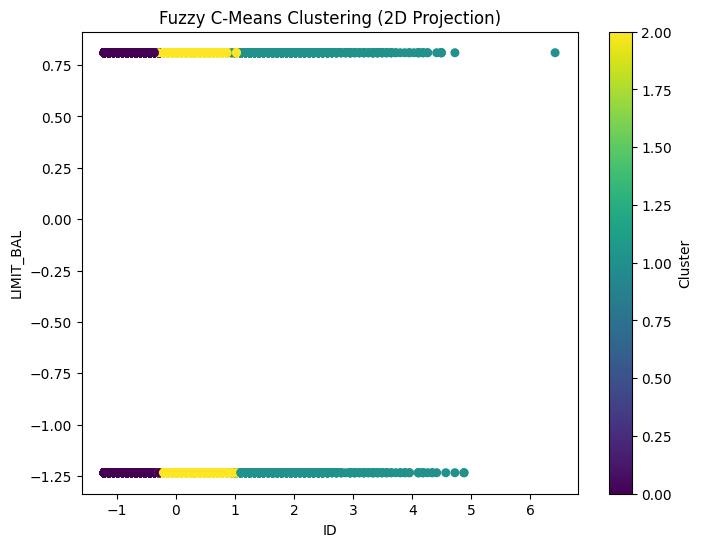

In [147]:
# Use original scaled but NOT transposed data for plotting
X_plot = X_scaled.T  # shape = (n_samples, n_features)


plt.figure(figsize=(8,6))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=cluster_membership, cmap='viridis', s=30)
plt.title('Fuzzy C-Means Clustering (2D Projection)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar(label='Cluster')
plt.show()
